In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Fraud.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Data Cleaning
df.drop_duplicates(inplace=True)  # Remove duplicates if any

In [ ]:
# Handling missing values (if any)
df.fillna(0, inplace=True)

In [ ]:
# Feature Engineering
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [ ]:
# Encoding categorical features
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# Dropping non-informative columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
# Data Transformation
scaler = StandardScaler()
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest']] = scaler.fit_transform(
    df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest']])

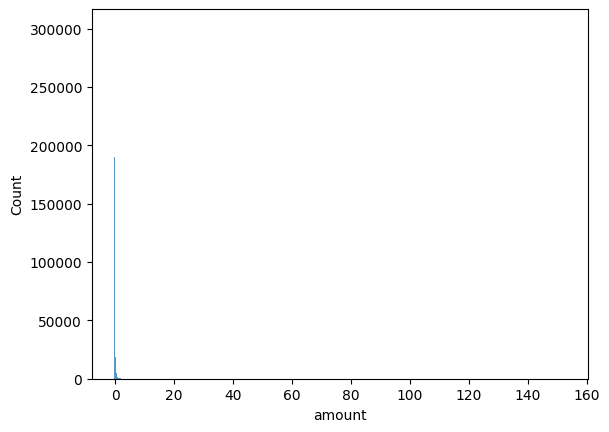

In [ ]:
# 3. EDA
sns.histplot(df['amount'])
plt.show()

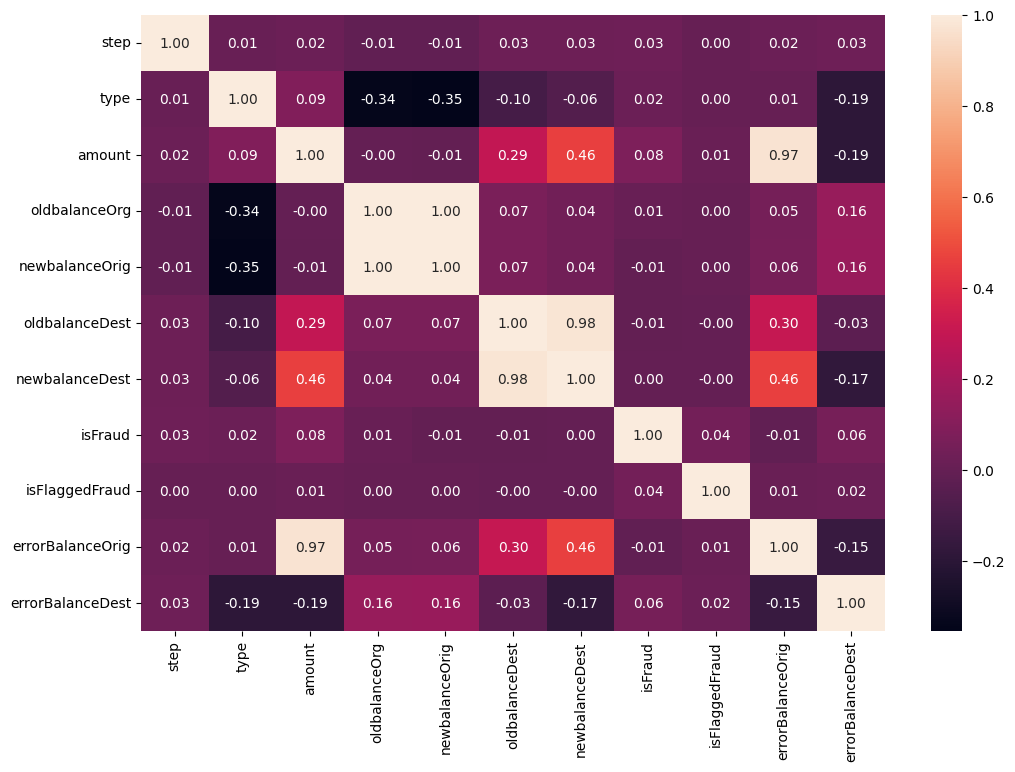

In [ ]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:
# 4. Data Splitting
X = df.drop(columns=['isFraud'])
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import joblib
import time

In [ ]:
# 5. Model Development with Optimizations
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [5, 10]
}

# Use RandomizedSearchCV with fewer iterations and parallelization
grid_search = RandomizedSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, n_iter=4, random_state=42)

# Start timing the grid search
start_time = time.time()

grid_search.fit(X_train, y_train)

# End timing the grid search
end_time = time.time()
print(f"Grid search took {end_time - start_time} seconds")

best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Grid search took 1981.538540840149 seconds


In [ ]:
# 6. Model Evaluation
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC: 0.9987827145465611


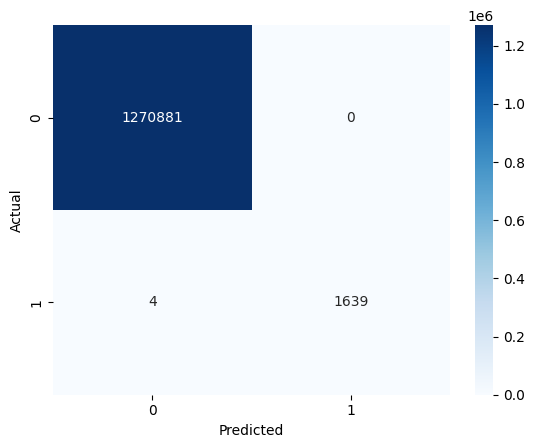

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

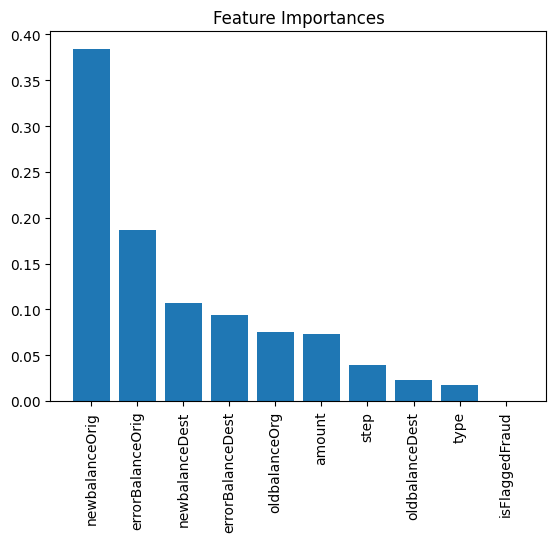

In [ ]:
# Feature Importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:

# 7. Actionable Plan
# Insights and Recommendations
fraud_threshold = 0.5  # This threshold can be adjusted based on business requirements

# Displaying some insights
print("Number of fraudulent transactions in the test set:", y_test.sum())
print("Number of fraudulent transactions predicted by the model:", (y_pred > fraud_threshold).sum())
print("Accuracy of the model:", (y_test == y_pred).mean())

Number of fraudulent transactions in the test set: 1643
Number of fraudulent transactions predicted by the model: 1639
Accuracy of the model: 0.9999968566408177
